**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('cleaned_data.csv')

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [21]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [40]:
params_dict={'max_depth':[3,6,9,12],'n_estimators':[10,50,100,200]}

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [41]:
from sklearn.model_selection import GridSearchCV
gds=GridSearchCV(rf,param_grid=params_dict,verbose=2,)

____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [42]:
gds.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ..................... max_depth=3, n_estimators=10, total=   0.0s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.0s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.6s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.5s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.5s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] .................... max_depth=3, n_estimators=100, total=   1.1s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] .................... max_depth=3, n_estimators=100, total=   1.2s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  2.0min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=4, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 6, 9, 12], 'n_estimators': [10, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [45]:
gds_res=pd.DataFrame(gds.cv_results_)
gds_res

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.129007,0.019334,0.819371,0.820238,3,10,"{'max_depth': 3, 'n_estimators': 10}",9,0.813388,0.821730,0.824754,0.818578,0.819972,0.820406,0.000817,1.602856e-02,0.004660,0.001292
1,0.618369,0.029668,0.815199,0.816371,3,50,"{'max_depth': 3, 'n_estimators': 50}",14,0.812122,0.818565,0.820253,0.814640,0.813221,0.815906,0.003399,4.714827e-04,0.003602,0.001636
2,1.178730,0.061670,0.813886,0.815034,3,100,"{'max_depth': 3, 'n_estimators': 100}",16,0.810997,0.815541,0.819550,0.814148,0.811111,0.815414,0.036262,3.770569e-03,0.004005,0.000629
3,2.349791,0.118673,0.814777,0.817050,3,200,"{'max_depth': 3, 'n_estimators': 200}",15,0.811419,0.819409,0.819409,0.814992,0.813502,0.816750,0.015860,1.246407e-03,0.003384,0.001816
4,0.212346,0.009000,0.819277,0.825442,6,10,"{'max_depth': 6, 'n_estimators': 10}",11,0.814653,0.827848,0.823347,0.823290,0.819831,0.825188,0.002055,8.164374e-04,0.003571,0.001870
5,1.079062,0.040002,0.820402,0.825512,6,50,"{'max_depth': 6, 'n_estimators': 50}",4,0.815919,0.828129,0.824332,0.823360,0.820956,0.825047,0.092853,1.414336e-03,0.003457,0.001975
6,2.091120,0.073338,0.820355,0.825090,6,100,"{'max_depth': 6, 'n_estimators': 100}",5,0.815216,0.827989,0.824473,0.823008,0.821378,0.824274,0.018458,2.054849e-03,0.003848,0.002114
7,4.083234,0.149009,0.820637,0.824762,6,200,"{'max_depth': 6, 'n_estimators': 200}",1,0.815638,0.828129,0.824473,0.822516,0.821800,0.823641,0.121599,4.242839e-03,0.003700,0.002425
8,0.287350,0.011001,0.816839,0.843631,9,10,"{'max_depth': 9, 'n_estimators': 10}",13,0.812403,0.844866,0.821378,0.843401,0.816737,0.842627,0.002495,1.946680e-07,0.003665,0.000929
9,1.516753,0.048336,0.819324,0.845764,9,50,"{'max_depth': 9, 'n_estimators': 50}",10,0.813810,0.846624,0.823347,0.844315,0.820816,0.846354,0.052642,2.054862e-03,0.004034,0.001031


**Find the best hyperparameters from the cross-validation.**

In [46]:
gds.best_params_

{'max_depth': 6, 'n_estimators': 200}

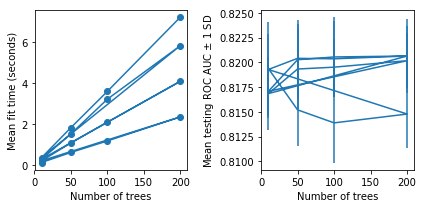

In [47]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(gds_res['param_n_estimators'],
            gds_res['mean_fit_time'],
            '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(gds_res['param_n_estimators'],
                gds_res['mean_test_score'],
                yerr=gds_res['std_test_score'])
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SD ')
plt.tight_layout()


________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [48]:
# Create a 5x5 grid
xx, yy = np.meshgrid(range(5), range(5))
print(xx)
print(yy)
print(xx.shape)
print(yy.shape)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
(5, 5)
(5, 5)


In [49]:

gds_res_mean_ts_rs=gds_res['mean_test_score'].values.reshape(4,4)
gds_res_mean_ts_rs

array([[0.81937087, 0.81519854, 0.81388589, 0.81477662],
       [0.81927711, 0.82040223, 0.82035535, 0.82063663],
       [0.81683934, 0.81932399, 0.81951151, 0.82016783],
       [0.81707374, 0.82026159, 0.82054287, 0.82063663]])

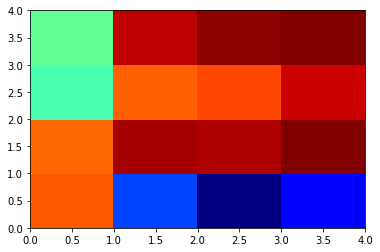

In [50]:
# Set color map to `plt.cm.jet`
ax=plt.axes()
pcolor=ax.pcolormesh(xx,yy,gds_res_mean_ts_rs,cmap=plt.cm.jet)

Text(0,0.5,'Y coordinate')

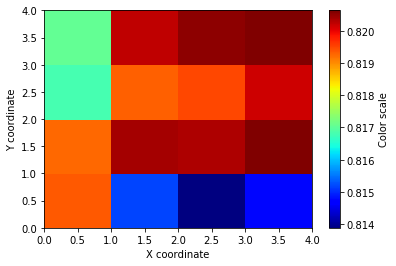

In [51]:
# Visualize pcolormesh
ax=plt.axes()
pcolor=ax.pcolormesh(xx,yy,gds_res_mean_ts_rs,cmap=plt.cm.jet)
plt.colorbar(pcolor, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [52]:
# Create a dataframe of the feature names and importance
gds_feat_imp=pd.DataFrame({'Features':features_response[:-1],'Importance':gds.best_estimator_.feature_importances_})
gds_feat_imp

,Features,Importance
0,LIMIT_BAL,0.060641
1,EDUCATION,0.003056
2,MARRIAGE,0.001605
3,AGE,0.010185
4,PAY_1,0.588212
5,BILL_AMT1,0.024228
6,BILL_AMT2,0.027810
7,BILL_AMT3,0.021564
8,BILL_AMT4,0.020105
9,BILL_AMT5,0.019006


In [53]:
# Sort values by importance
gds_feat_imp.sort_values(by='Importance',ascending=False)

,Features,Importance
4,PAY_1,0.588212
11,PAY_AMT1,0.064168
0,LIMIT_BAL,0.060641
12,PAY_AMT2,0.042940
13,PAY_AMT3,0.034769
6,BILL_AMT2,0.027810
14,PAY_AMT4,0.025213
5,BILL_AMT1,0.024228
7,BILL_AMT3,0.021564
15,PAY_AMT5,0.020151
